In [19]:
# choose the Delivery_Time.csv data set
dl.tm <- read.csv(file.choose()) 

In [21]:
# windows()
dt.st <- dl.tm

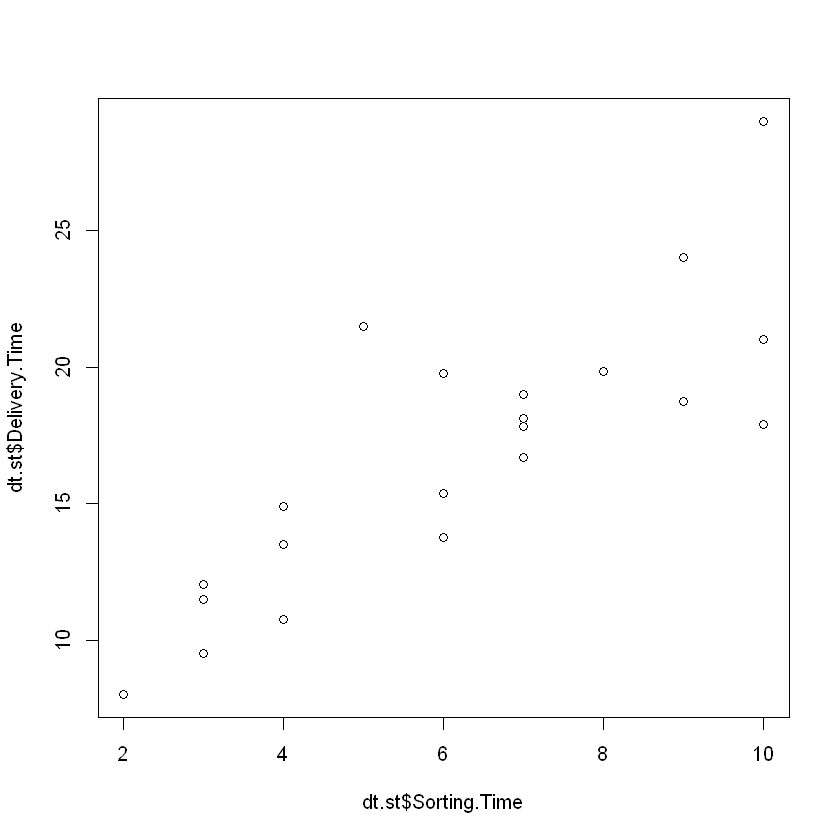

In [23]:
plot(dt.st$Sorting.Time,dt.st$Delivery.Time)

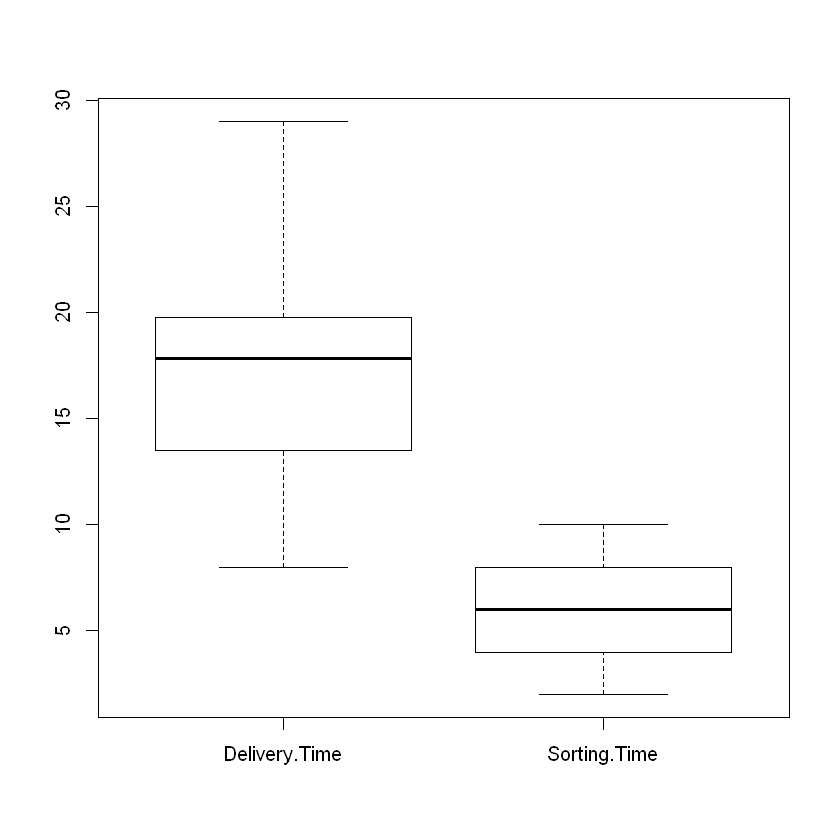

In [24]:
# Other Exploratory data analysis and Plots

boxplot(dt.st)

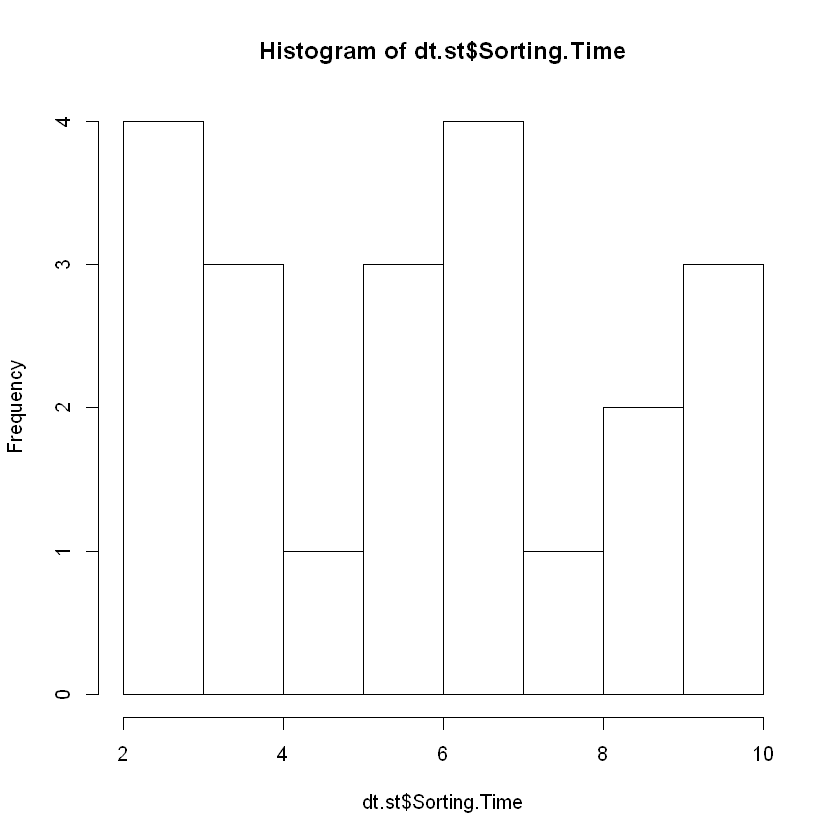

In [25]:
hist(dt.st$Sorting.Time)

In [26]:
summary(dt.st)

 Delivery.Time    Sorting.Time  
 Min.   : 8.00   Min.   : 2.00  
 1st Qu.:13.50   1st Qu.: 4.00  
 Median :17.83   Median : 6.00  
 Mean   :16.79   Mean   : 6.19  
 3rd Qu.:19.75   3rd Qu.: 8.00  
 Max.   :29.00   Max.   :10.00  

In [27]:
# Correlation coefficient value for Delivery Time and Sorting Time
dt<- dt.st$Delivery.Time
st <- dt.st$Sorting.Time
cor(st,dt)

[1] 0.8259973

In [28]:
# If |r| is greater than  0.85 then Co-relation is Strong(Correlation Co-efficient = 0.8259973). 
# This has a moderate Correlation 

# Simple model without using any transformation
reg<-lm(dt~st)
summary(reg)


Call:
lm(formula = dt ~ st)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1729 -2.0298 -0.0298  0.8741  6.6722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.5827     1.7217   3.823  0.00115 ** 
st            1.6490     0.2582   6.387 3.98e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.935 on 19 degrees of freedom
Multiple R-squared:  0.6823,	Adjusted R-squared:  0.6655 
F-statistic:  40.8 on 1 and 19 DF,  p-value: 3.983e-06


In [29]:
# Probability value should be less than 0.05(0.00115)
# The multiple-R-Squared Value is 0.6823 which is lesser than 0.8(In General)
# Adjusted R-Squared Value is 0.6655 
# The Probability Value for F-Statistic is 3.983e-06(Overall Probability Model is also less than 0.05)
confint(reg,level = 0.95) # confidence interval

,2.5 %,97.5 %
(Intercept),2.979134,10.186334
st,1.108673,2.189367


In [30]:
# The above code will get you 2 equations 
# 1 to caliculate the lower range and other for upper range

# Function to Predict the above model 
predict(reg,interval="predict")

Warning message in predict.lm(reg, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
23.072933,16.457161,29.68870
13.178814,6.780993,19.57663
16.476853,10.188630,22.76508
21.423913,14.955850,27.89198
23.072933,16.457161,29.68870
16.476853,10.188630,22.76508
18.125873,11.823294,24.42845
11.529794,5.010345,18.04924
23.072933,16.457161,29.68870
21.423913,14.955850,27.89198


In [31]:
# predict(reg,type="prediction")
# Adjusted R-squared value for the above model is 0.6655 

# we may have to do transformation of variables for better R-squared value
# Applying transformations

# Logarthmic transformation
reg_log<-lm(dt~log(st))  # Regression using logarthmic transformation
summary(reg_log)


Call:
lm(formula = dt ~ log(st))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0829 -2.0133 -0.1965  0.9351  7.0171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.160      2.455   0.472    0.642    
log(st)        9.043      1.373   6.587 2.64e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.873 on 19 degrees of freedom
Multiple R-squared:  0.6954,	Adjusted R-squared:  0.6794 
F-statistic: 43.39 on 1 and 19 DF,  p-value: 2.642e-06


In [32]:
confint(reg_log,level=0.95)

,2.5 %,97.5 %
(Intercept),-3.97778,6.297147
log(st),6.16977,11.917057


In [33]:
predict(reg_log,interval="predict")

Warning message in predict.lm(reg_log, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
21.98291,15.6099875,28.35584
13.69652,7.4628028,19.93023
17.36331,11.2049447,23.52167
21.03009,14.7287585,27.33143
21.98291,15.6099875,28.35584
17.36331,11.2049447,23.52167
18.75735,12.5700473,24.94466
11.09489,4.6786298,17.51115
21.98291,15.6099875,28.35584
21.03009,14.7287585,27.33143


In [34]:
# Multiple R-squared value for the above model is 0.6954
# Adjusted R-squared:  0.6794 

# we may have to do different transformation for a better R-squared value
# Applying different transformations

# Exponential model 
reg_exp<-lm(log(dt)~st) # regression using Exponential model
summary(reg_exp)



Call:
lm(formula = log(dt) ~ st)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29209 -0.13364  0.02065  0.08421  0.41892 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.12137    0.10297  20.601 1.86e-14 ***
st           0.10555    0.01544   6.836 1.59e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1755 on 19 degrees of freedom
Multiple R-squared:  0.7109,	Adjusted R-squared:  0.6957 
F-statistic: 46.73 on 1 and 19 DF,  p-value: 1.593e-06


In [35]:
confint(reg_exp,level=0.95)

,2.5 %,97.5 %
(Intercept),1.90584807,2.3368956
st,0.07323457,0.1378686


In [36]:
exp(predict(reg_exp,interval="predict"))

Warning message in predict.lm(reg_exp, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
23.97203,16.138575,35.60775
12.72512,8.679275,18.65695
15.71603,10.789743,22.89153
21.57071,14.650800,31.75904
23.97203,16.138575,35.60775
15.71603,10.789743,22.89153
17.46560,11.980604,25.46174
11.45042,7.753250,16.91061
23.97203,16.138575,35.60775
21.57071,14.650800,31.75904


In [37]:
# R-squared value - 0.7109
# Adjusted R SQuare Value - 0.6957 
# Higher the R-sqaured value - Better chances of getting good model 
# for Delivery Time and Sorting Time

# Quadratic model
dt.st[,"st_sq"] = st*st

# Quadratic model
quad_mod <- lm(dt~st+I(st^2),data=dt.st)
summary(quad_mod)


Call:
lm(formula = dt ~ st + I(st^2), data = dt.st)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4324 -1.6951 -0.5365  0.9075  6.6676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.5222     4.1597   0.847   0.4082  
st            2.8130     1.4608   1.926   0.0701 .
I(st^2)      -0.0932     0.1151  -0.810   0.4286  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.962 on 18 degrees of freedom
Multiple R-squared:  0.6934,	Adjusted R-squared:  0.6594 
F-statistic: 20.36 on 2 and 18 DF,  p-value: 2.391e-05


In [38]:
confint(quad_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),-5.2169258,12.2613936
st,-0.2560669,5.8820703
I(st^2),-0.3349939,0.1485975


In [39]:
predict(quad_mod,interval="predict")

Warning message in predict.lm(quad_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
22.332430,15.360768,29.30409
13.283069,6.796484,19.76965
17.045108,10.506802,23.58341
21.290194,14.728917,27.85147
22.332430,15.360768,29.30409
17.045108,10.506802,23.58341
18.646533,12.120732,25.17233
11.122455,4.434281,17.81063
22.332430,15.360768,29.30409
21.290194,14.728917,27.85147


In [40]:
# Adjusted R-Squared = 0.6594
#Multiple R -Squared Value = 0.6934

# Quadratic model
qd_model <- lm(dt~st+st_sq,data=dt.st)
summary(qd_model)


Call:
lm(formula = dt ~ st + st_sq, data = dt.st)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4324 -1.6951 -0.5365  0.9075  6.6676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.5222     4.1597   0.847   0.4082  
st            2.8130     1.4608   1.926   0.0701 .
st_sq        -0.0932     0.1151  -0.810   0.4286  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.962 on 18 degrees of freedom
Multiple R-squared:  0.6934,	Adjusted R-squared:  0.6594 
F-statistic: 20.36 on 2 and 18 DF,  p-value: 2.391e-05


In [41]:
confint(quad_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),-5.2169258,12.2613936
st,-0.2560669,5.8820703
I(st^2),-0.3349939,0.1485975


In [42]:
predict(quad_mod,interval="predict")

Warning message in predict.lm(quad_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
22.332430,15.360768,29.30409
13.283069,6.796484,19.76965
17.045108,10.506802,23.58341
21.290194,14.728917,27.85147
22.332430,15.360768,29.30409
17.045108,10.506802,23.58341
18.646533,12.120732,25.17233
11.122455,4.434281,17.81063
22.332430,15.360768,29.30409
21.290194,14.728917,27.85147


In [43]:
# Adjusted R-Squared = 0.6594
#Multiple R -Squared Value = 0.6934

# Cubic model
poly_mod <- lm(dt~st+I(st^2)+I(st^3),data=dt.st)
summary(poly_mod) # 0.9811


Call:
lm(formula = dt ~ st + I(st^2) + I(st^3), data = dt.st)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8972 -1.7972 -0.1601  0.8077  6.2028 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -4.15818   10.98653  -0.378    0.710
st           7.50248    6.37003   1.178    0.255
I(st^2)     -0.92525    1.10553  -0.837    0.414
I(st^3)      0.04446    0.05874   0.757    0.460

Residual standard error: 2.998 on 17 degrees of freedom
Multiple R-squared:  0.7034,	Adjusted R-squared:  0.6511 
F-statistic: 13.44 on 3 and 17 DF,  p-value: 9.586e-05


In [44]:
confint(poly_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),-27.33772564,19.0213717
st,-5.93710786,20.9420660
I(st^2),-3.25771246,1.4072034
I(st^3),-0.07947156,0.1683837


In [45]:
predict(poly_mod,interval="predict")

Warning message in predict.lm(poly_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
22.797240,15.5939839,30.00050
13.892856,7.0844910,20.70122
17.150048,10.4982995,23.80180
20.827000,14.0344853,27.61951
22.797240,15.5939839,30.00050
17.150048,10.4982995,23.80180
18.270140,11.5550572,24.98522
11.222284,4.4189573,18.02561
22.797240,15.5939839,30.00050
20.827000,14.0344853,27.61951


In [49]:
# Adjusted R-Squared = 0.6511
#Multiple R -Squared Value = 0.7034

model_R_Squared_values <- list(model=NULL,R_squared=NULL)
model_R_Squared_values[["model"]] <- c("reg","reg_log","reg_exp","quad_mod","poly_mod")
model_R_Squared_values[["R_squared"]] <- c(0.6655,0.6794,0.6957,0.6594,0.6511)
Final <- cbind(model_R_Squared_values[["model"]],model_R_Squared_values[["R_squared"]])


# Exponential  model gives the best Adjusted R-Squared value
predicted_Value <- exp(predict(reg_exp))
predicted_Value

1        2        3        4        5        6        7        8 
23.97203 12.72512 15.71603 21.57071 23.97203 15.71603 17.46560 11.45042 
       9       10       11       12       13       14       15       16 
23.97203 21.57071 19.40993 12.72512 17.46560 11.45042 11.45042 12.72512 
      17       18       19       20       21 
15.71603 17.46560 10.30341 17.46560 14.14173

In [50]:
Final <- cbind(Sorting_Time=dt.st$Sorting.Time ,Delivery_Time = dt.st$Delivery.Time,Predicted_Delivery_time=predicted_Value)


rmse<-sqrt(mean((predicted_Value-dt)^2))
rmse

[1] 2.94025

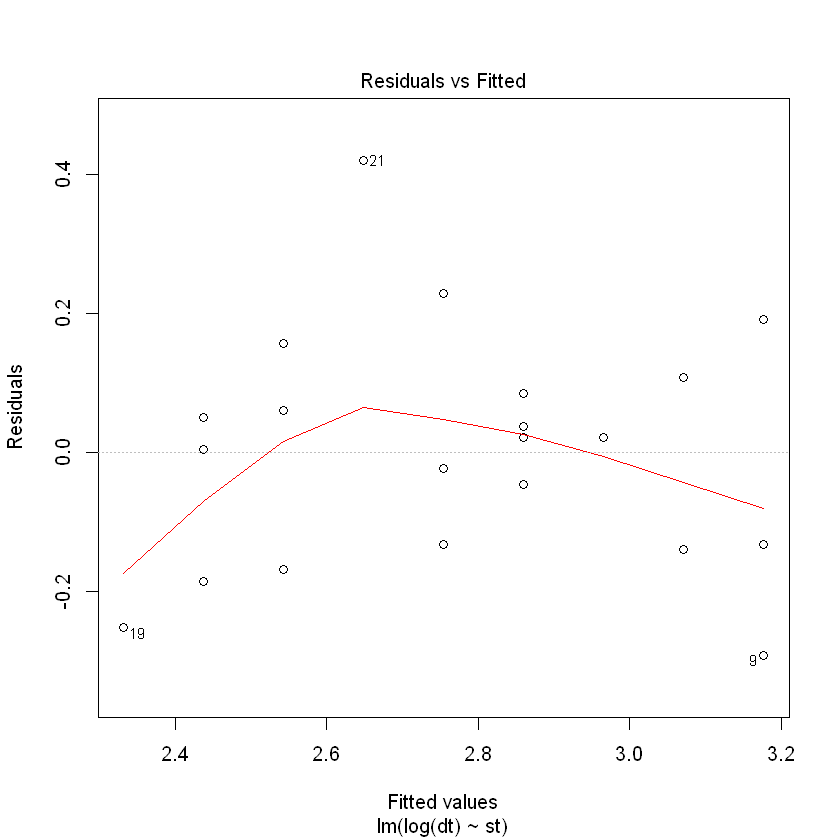

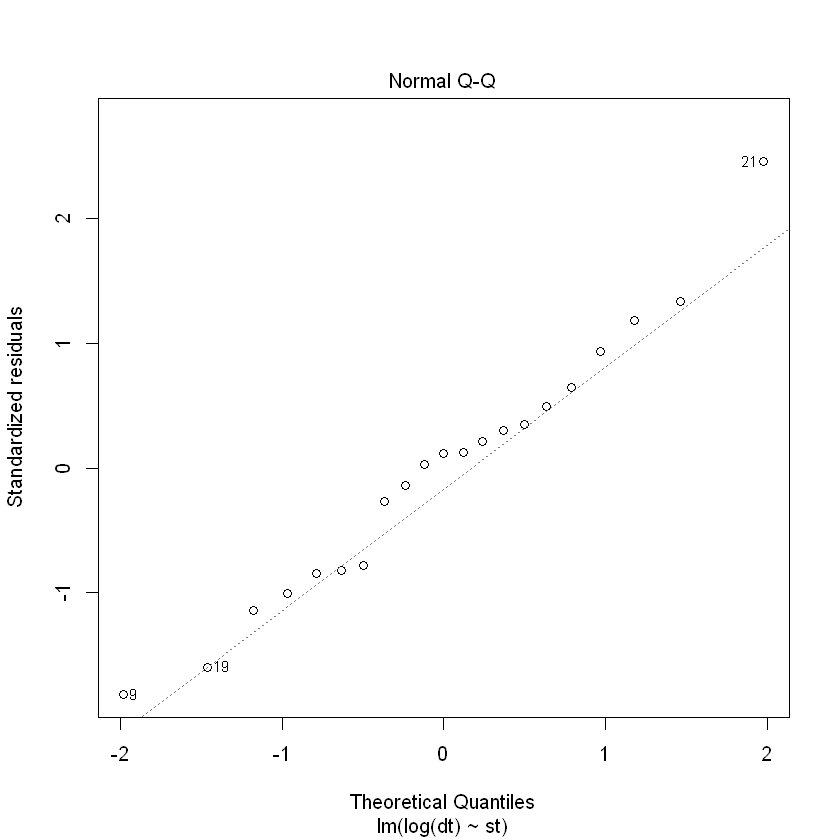

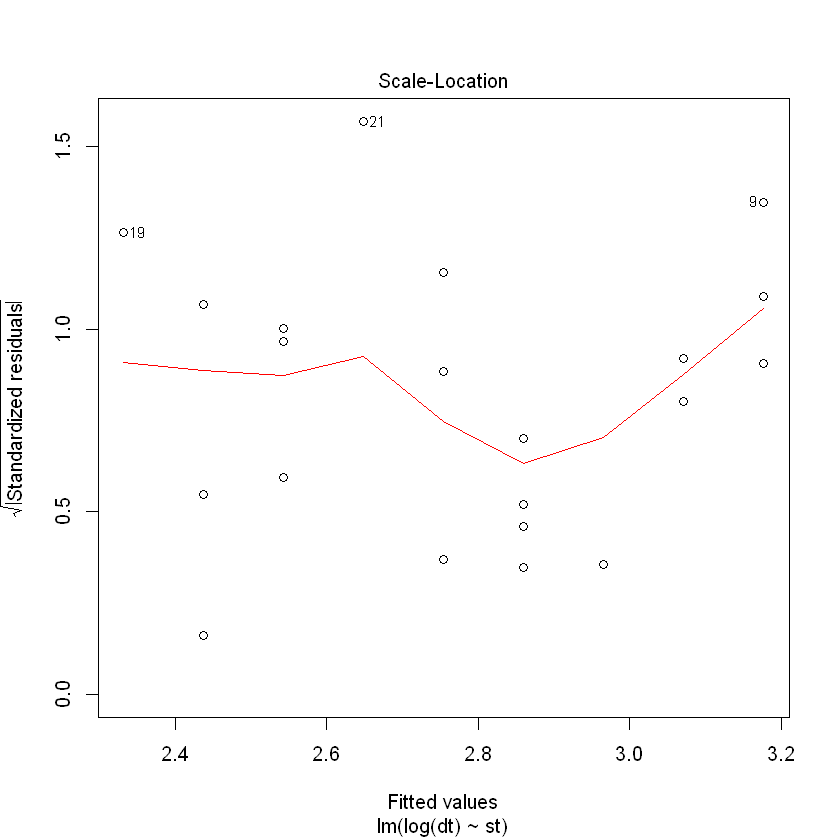

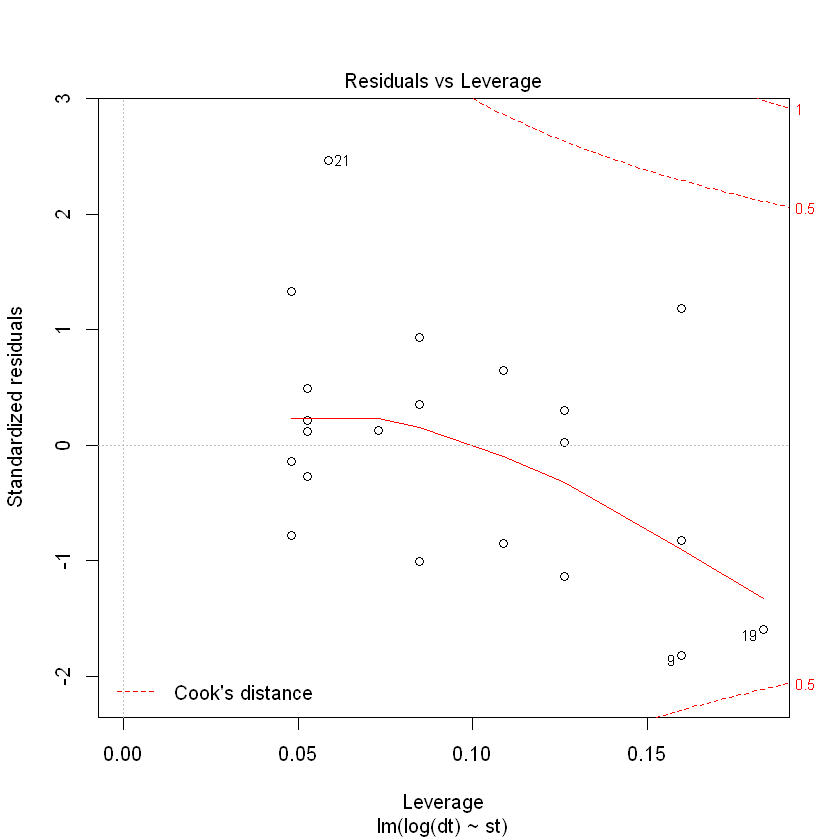

In [51]:
plot(reg_exp)

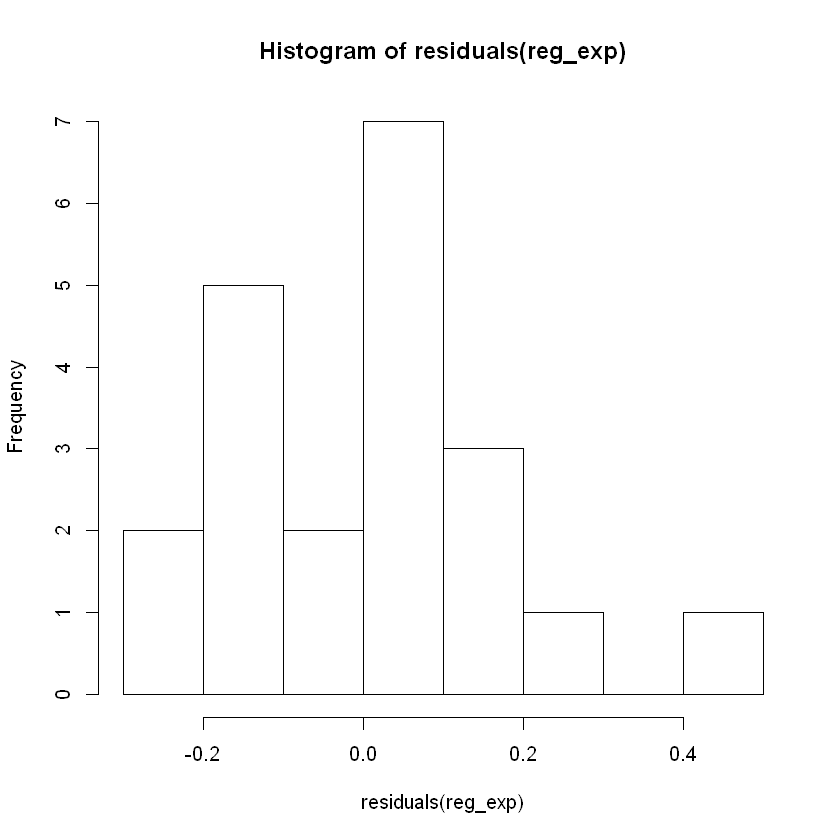

In [52]:
hist(residuals(reg_exp)) # close to normal distribution